In [ ]:
!pip install gymnasium
import pygame, math
import numpy as np
from time import sleep
import gymnasium as gym
from gymnasium import Env, spaces, register, make
import random
import warnings
import scipy.stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.0 MB/s eta 0:00:00
pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


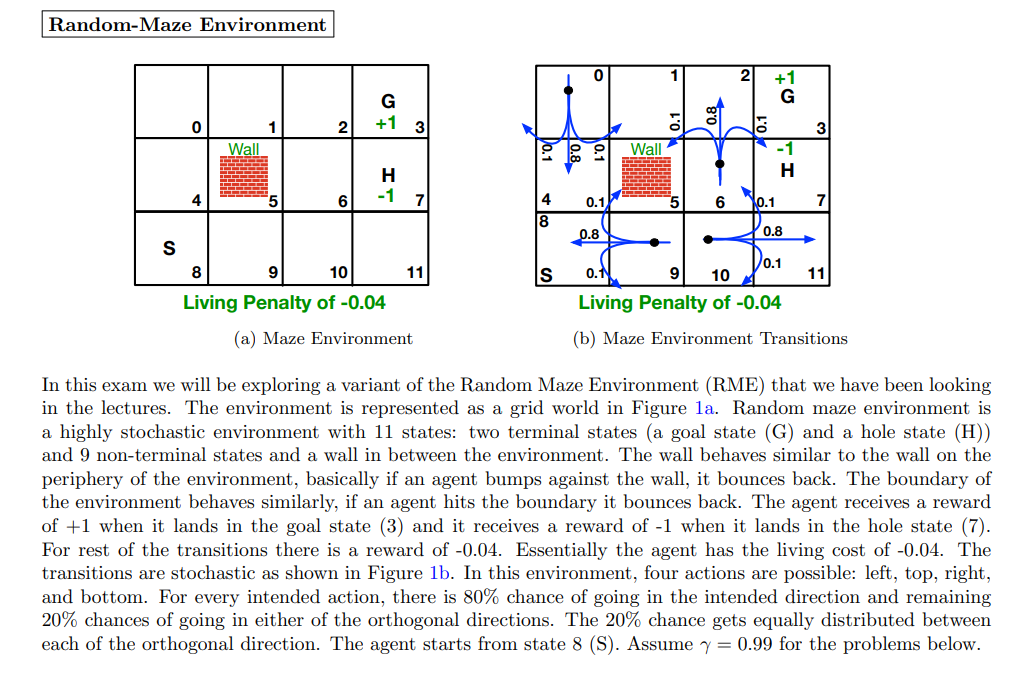

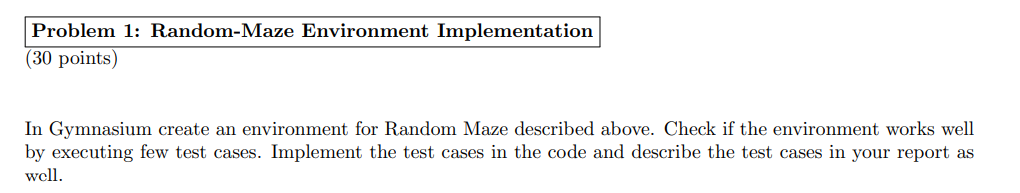

In [ ]:
class RME(Env):

    def __init__(self, seed=69):
        self.P = {
            0:{"Top":[(0.8,0,-0.04,False), (0.1,0,-0.04,False), (0.1,1,-0.04,False)],
               "Right":[(0.8,1,-0.04,False), (0.1,0,-0.04,False), (0.1,4,-0.04,False)],
               "Left":[(0.8,0,-0.04,False), (0.1,0,-0.04,False), (0.1,4,-0.04,False)],
               "Bottom":[(0.8,4,-0.04,False), (0.1,1,-0.04,False),(0.1,0,-0.04,False)]
               },
            1:{"Top":[(0.8,1,-0.04,False),(0.1,2,-0.04,False),(0.1,1,-0.04,False)],
               "Right":[(0.8,2,-0.04,False),(0.1,1,-0.04,False),(0.1,1,-0.04,False)],
               "Left":[(0.8,0,-0.04,False),(0.1,1,-0.04,False),(0.1,1,-0.04,False)],
               "Bottom":[(0.8,1,-0.04,False),(0.1,2,-0.04,False),(0.1,0,-0.04,False)]
               },
            2:{"Top":[(0.8,2,-0.04,False), (0.1,1,-0.04,False),(0.1,3,1,True)],
               "Right":[(0.8,3,1,True),(0.1,2,-0.04,False),(0.1,6,-0.04,False)],
               "Left":[(0.8,1,-0.04,False), (0.1,2,-0.04,False), (0.1,6,-0.04,False)],
               "Bottom":[(0.8,6,-0.04,False),(0.1,1,-0.04,False),(0.1,3,-0.04,True)]
               },
            3:{"Top":[(1,3,0,True)],
               "Right":[(1,3,0,True)],
               "Left":[(1,3,0,True)],
               "Bottom":[(1,3,0,True)]
               },
            4:{"Top":[(0.8,1,-0.04,False),(0.2,4,-0.04,False)],
               "Right":[(0.8,4,-0.04,False),(0.1,0,-0.04,False),(0.1,8,-0.04,False)],
               "Left":[(0.8,4,-0.04,False), (0.1,0,-0.04,False), (0.1,8,-0.04,False)],
               "Bottom":[(0.8,8,-0.04,False),(0.2,4,-0.04,False)]
               },
            5:{"Top":[],
               "Right":[],
               "Left":[],
               "Bottom":[]
               },
            6:{"Top":[(0.8,2,-0.04,False), (0.1,6,-0.04,False), (0.1,7,-1,True)],
               "Right":[(0.8,7,-1,True), (0.1,2,-0.04,False), (0.1,10,-0.04,False)],
               "Left":[(0.8,6,-0.04,False), (0.1,2,-0.04,False), (0.1,10,-0.04,False)],
               "Bottom":[(0.8,10,-0.04,False), (0.1,7,-1,True), (0.1,5,-0.04,False)]
               },
            7:{"Top":[(1,7,0,True)],
               "Right":[(1,7,0,True)],
               "Left":[(1,7,0,True)],
               "Bottom":[(1,7,0,True)]
               },
            8:{"Top":[(0.8,4,-0.04,False),(0.1,8,-0.04,False),(0.1,9,-0.04,False)],
               "Right":[(0.8,9,-0.04,False),(0.1,4,-0.04,False),(0.1,8,-0.04,False)],
               "Left":[(0.9,8,-0.04,False),(0.1,4,-0.04,False)],
               "Bottom":[(0.9,8,-0.04,False),(0.1,9,-0.04,False)]
               },
            9:{"Top":[(0.8,9,-0.04,False),(0.1,8,-0.04,False),(0.1,10,-0.04,False)],
               "Right":[(0.8,10,-0.04,False),(0.2,9,-0.04,False)],
               "Left":[(0.8,10,-0.04,False),(0.2,9,-0.04,False)],
               "Bottom":[(0.8,9,-0.04,False),(0.1,8,-0.04,False),(0.1,10,-0.04,False)]
               },
            10:{"Top":[(0.8,6,-0.04,False),(0.1,9,-0.04,False),(0.1,11,-0.04,False)],
               "Right":[(0.8,11,-0.04,False),(0.1,6,-0.04,False),(0.1,10,-0.04,False)],
               "Left":[(0.8,9,-0.04,False),(0.1,6,-0.04,False),(0.1,10,-0.04,False)],
               "Bottom":[(0.8,10,-0.04,False),(0.1,9,-0.04,False),(0.1,11,-0.04,False)]
               },
            11:{"Top":[(0.8,7,-1,True),(0.1,10,-0.04,False),(0.1,11,-0.04,False)],
               "Right":[(0.9,11,-0.04,False),(0.1,7,-1,True)],
               "Left":[(0.8,10,-0.04,False),(0.1,11,-0.04,False),(0.1,7,-1,True)],
               "Bottom":[(0.9,11,-0.04,False),(0.1,10,-0.04,False)]
               }
            }
        #self.size = 3 # The size of the 1D grid
        self.seed = seed
        self.state_space_size = 12
        self.action_space_size = 4
        self.state_space = [0,1,2,3,4,5,6,7,8,9,10,11]
        self.action_space_list = ["Top","Right","Left","Bottom"]

        self.observation_space = spaces.Discrete(self.state_space_size)

        self.action_space = spaces.Discrete(self.action_space_size)


    def state_space():
      return env.state_space

    def action_space():
      return env.action_space

    def _get_obs(self):

        return {"agent": self._agent_location}


    def _get_info(self):
        return {
            "agent": abs(self._agent_location)
        }

    def reset(self, options=None):
        super().reset(seed=self.seed)
        self._agent_location = 8

        observation = self._get_obs()
        info = self._get_info()

        return observation, info


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, terminals = zip(*transitions)

        # Randomly select a transition based on the probabilities
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        self._agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]

        truncated = False
        observation = self._get_obs()
        info = self._get_info()

        info["log"] = {"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location}

        # Return the required 5-tuple
        return observation, reward, terminated, truncated, info

# Register the custom environment
register(id='RME-v0', entry_point=RME)
env = make('RME-v0')

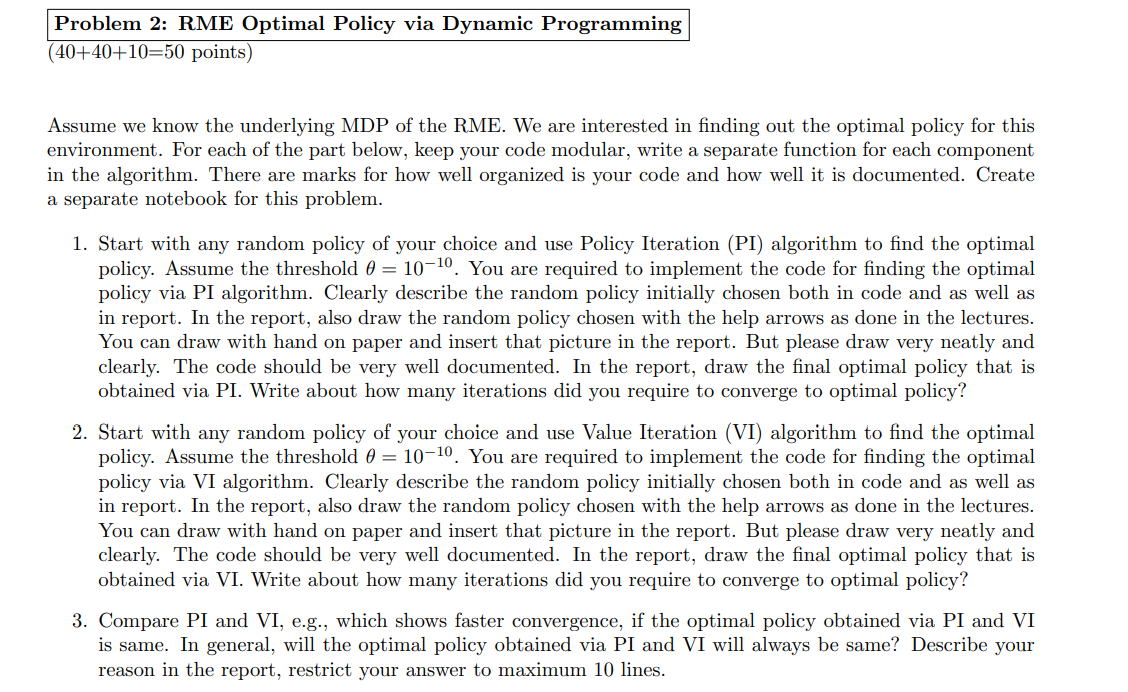


In [ ]:
default_policy = {}
for s in env.state_space:
  temp={}
  for a in env.action_space_list:
    temp[a]=0.25
  default_policy[s]=temp

default_policy

{0: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 1: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 2: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 3: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 4: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 5: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 6: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 7: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 8: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 9: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 10: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
 11: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25}}

In [ ]:
def PolicyEvaluation(policy,env,gamma=0.01,theta=1e-3,maxSteps=1000000):
  P = env.P
  v_old = np.zeros(env.state_space_size)
  i=0
  while True:
    v_new = np.zeros(env.state_space_size)
    for s in env.state_space:
      for a in env.action_space_list:
        temp=0
        for p,ns,r,_ in P[s][a]:
          temp+=p*(r+gamma*v_old[ns])
        v_new = v_new + policy[s][a]*temp
    if(max(abs(v_new-v_old))<theta or i>maxSteps):
      break
    i+=1
    v_old = v_new

  return v_new

In [ ]:
PolicyEvaluation(policy=default_policy, env=env)

array([-0.68079919, -0.68079919, -0.68079919, -0.68079919, -0.68079919,
       -0.68079919, -0.68079919, -0.68079919, -0.68079919, -0.68079919,
       -0.68079919, -0.68079919])

In [ ]:
def PolicyImprovement(v,env,gamma=0.99):
  P=env.P
  Q={}
  for i in env.state_space:
    temp={}
    for j in env.action_space_list:
      temp[j]=0
    Q[i]=temp

  policy = {}
  for i in env.state_space:
    temp={}
    for j in env.action_space_list:
      temp[j]=0.25
    policy[i]=temp

  for s in env.state_space:
    for a in env.action_space_list:
      for p,ns,r,_ in P[s][a]:
        Q[s][a] += p*(r+gamma*v[ns])

  for s in env.state_space:
    act = max(Q[s], key=Q[s].get)
    for a in env.action_space_list:
      policy[s][a]
    policy[s][act] = 1

  return policy

Solution to 2.1

In [ ]:
def PolicyIteration(env,gamma=0.99,theta=1e-10,maxSteps=10000):
  P=env.P
  policy = {}
  for i in env.state_space:
    temp={}
    for j in env.action_space_list:
      temp[j]=0
    policy[i]=temp
  i=0
  while True:
    policy_old = policy
    v = PolicyEvaluation(policy,env)
    policy = PolicyImprovement(v,env)
    if policy_old == policy or i>maxSteps:
      break
    i+=1
  return v, policy

In [ ]:
PolicyIteration(env)

(array([-0.31199181, -0.31199181, -0.31199181, -0.31199181, -0.31199181,
        -0.31199181, -0.31199181, -0.31199181, -0.31199181, -0.31199181,
        -0.31199181, -0.31199181]),
 {0: {'Top': 1, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
  1: {'Top': 1, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
  2: {'Top': 0.25, 'Right': 1, 'Left': 0.25, 'Bottom': 0.25},
  3: {'Top': 1, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
  4: {'Top': 1, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
  5: {'Top': 1, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
  6: {'Top': 0.25, 'Right': 0.25, 'Left': 1, 'Bottom': 0.25},
  7: {'Top': 1, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
  8: {'Top': 1, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
  9: {'Top': 0.25, 'Right': 1, 'Left': 0.25, 'Bottom': 0.25},
  10: {'Top': 1, 'Right': 0.25, 'Left': 0.25, 'Bottom': 0.25},
  11: {'Top': 0.25, 'Right': 0.25, 'Left': 0.25, 'Bottom': 1}})

Solution to 2.2

In [ ]:
def ValueIteration(env,policy, gamma=0.99 , theta=1e-10, maxSteps=10000):
  P=env.P
  v = np.zeros(size = env.state_space_size)
  i=0
  while True:
    Q = {}
    for s in env.state_space:
      temp={}
      for a in env.action_space_list:
        temp[a]=0
      Q[s]=temp

    for s in env.state_space:
      for a in env.action_space_list:
        for p,ns,r,_ in P[s][a]:
          Q[s][a] += p*(r+gamma*v[ns])

    if i>maxSteps:
      break

    i+=1

  for s in env.state_space:
    act = max(Q,key=Q.get())
    policy[s][:]=0
    policy[s][act] = 1

  return v, policy